# Figure: Cross Sections

## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLine2D, HandlerTuple
from matplotlib.ticker import MultipleLocator, AutoMinorLocator
import glob
import string
import re
%matplotlib inline

In [2]:
%run rc_params.py
%run constants.py
%run plot_helper.py

In [3]:
color_list = ['Reds', 'Oranges', 'Greens', 'Blues', 'Purples', 'Greys', 'plasma']
cmaps = [plt.get_cmap(name) for name in color_list]
colors = [cmap(0.55 - 0.1 * (i == 0)) for i, cmap in enumerate(cmaps)]

extended_colors=plt.get_cmap('tab20').colors
#define_color_latex()

In [4]:
files = glob.glob("data/Fig[23]*.txt")
dfs = {}
for file in files:
    #df = pd.DataFrame()
    match = re.search(r"Fig[23][ab](.+)\.txt", file)
    data = pd.read_csv(file, skiprows=0, sep=' ', engine="python")
    #data["type"]=match.group(1)
    #df=pd.concat([df, data])
    dfs[match.group(1)] = data
dfs["TotCrossSects"].head()

,Energy,Exact,Mix4Av,Mix6Av,Mix8Av,Mix10Av,Exact5%,Exact95%
0,3,1812.005413,1878.313401,1813.409518,1812.174289,1812.003000,1238.260514,2299.043270
1,5,1650.276398,1650.689587,1650.923877,1650.298077,1650.273343,815.549063,2336.797315
2,7,1503.623794,1501.622442,1502.557421,1503.571345,1503.622405,836.745281,2191.688500
3,9,1335.478973,1340.897889,1336.082829,1335.365522,1335.477467,765.191238,2022.267650
4,11,1164.984185,1167.292009,1164.664065,1165.035415,1164.983904,726.068701,1926.178816


## Plots

In [5]:
listKvp = ["K", "T", "Tinv", "Mix"]
def kvpLbl(string):
    if "Mix" in string:
        return "mix"
    lbl = string.replace("av", "")
    return f"${lbl}$"

In [6]:
def set_panel_params(ax):
    # set ticks
    ax.xaxis.set_ticks_position('both')
    ax.yaxis.set_ticks_position('both') 
    #ax.xaxis.set_minor_locator(AutoMinorLocator(n=5))
    ax.minorticks_on()
    ax.yaxis.set_minor_locator(AutoMinorLocator(n=100))
    #ax.tick_params(width=0.7, which='major')
    
    ax.set_yscale('log')

In [7]:
def make_panel_value(ax, quantity, legendHandlers, legendLbls, xaxisLbl=False, yaxisLbl=True, tag=None):
    # plot different KVPs
    dataSet = dfs[quantity]
    
    # set axis labels 
    if quantity == "TotCrossSects":
        # set axis labels
        xvar = "Energy"
        ax.set_ylabel(r"Cross Section [mb]")
        if xaxisLbl: ax.set_xlabel(r"Energy $E$ [MeV]")
        ax.set_ylim(8e2,3e3)
            
    else: # differential cross sections
        # set axis labels
        xvar = "Theta"
        ax.set_ylabel(r"Diff. Cross Section [mb/sr]")
        if xaxisLbl: ax.set_xlabel(r"Scattering Angle $\theta$ [deg]")
            
    # plot results
    for ibsize, bsize in enumerate((4, 6, 8, 10)):
        ax.plot(dataSet[xvar], dataSet[f"Mix{bsize}Av"], color=colors[ibsize], ls="-") #, label="exact")  

    linePlot, = ax.plot(dataSet[xvar], dataSet["Exact"], color="k", ls=":", label="exact")        
    legendHandlers.append( linePlot )
    legendLbls.append(f"exact")
        
    # place legend
    #if pltType == "phaseShift" and potential == "WS":
    #    ax.legend(ncol=1)
    
    # add tag for subplots
    ax.text(0.06, 0.84, f"({tag})", horizontalalignment='center',
            verticalalignment='center', transform=ax.transAxes)
    

    # set axis limits
    #if potential == "WS":
    #    ax.set_xlim(0, 6)
    #else:
    #    ax.set_xlim(0,120)
    
    set_panel_params(ax)

In [8]:
def make_panel_residual(ax, quantity, legendHandlers, legendLbls, 
                        xaxisLbl=False, yaxisLbl=True, tag=None):
    # plot different KVPs
    dataSet = dfs[f"Res{quantity}"]
    
    # set axis labels 
    ax.set_ylabel(r"Av. Rel. Residual")
    if quantity == "TotCrossSects":
        # set axis labels
        xvar = "Energy"
        if xaxisLbl: ax.set_xlabel(r"Energy $E$ [MeV]")
#         # plot results
#         for ikvp, kvp in enumerate(("Kav", "Tav", "Mix8Av")):
#             linePlot, = ax.plot(dataSet["Energy"], dataSet[kvp], color=colors[ikvp], ls="-", label=kvp[0])
#             #if "Mix" in kvp:
#             #    legendHandlers.append(linePlot)
#             #    legendLbls.append("mix")

    else:
        # set axis labels
        xvar = "Theta"
        if xaxisLbl: ax.set_xlabel(r"Scattering Angle $\theta$ [deg]")
            
    # plot results
    for ibsize, bsize in enumerate((4, 6, 8, 10)):
        plotUncert = ax.fill_between(dataSet[xvar], 
                        dataSet[f"MedianMix{bsize}"], dataSet[f"95%Mix{bsize}"],
                        color=colors[ibsize], alpha=0.6)
        linePlot, = ax.plot(dataSet[xvar], dataSet[f"Mix{bsize}Av"],
                        color=colors[ibsize], alpha=1)       
        legendHandlers.append((plotUncert, linePlot))
        legendLbls.append(f"$N_b = {bsize}$")
        
    # place legend
    #if pltType == "phaseShift" and potential == "WS":
    #    ax.legend(ncol=1)

    # add tag for subplots
    ax.text(0.06, 0.84, f"({tag})", horizontalalignment='center',
            verticalalignment='center', transform=ax.transAxes)

    # set axis limits
    #if potential == "WS":
    #    ax.set_xlim(0, 6)
    #else:
    #    ax.set_xlim(0,120)
    
    set_panel_params(ax)

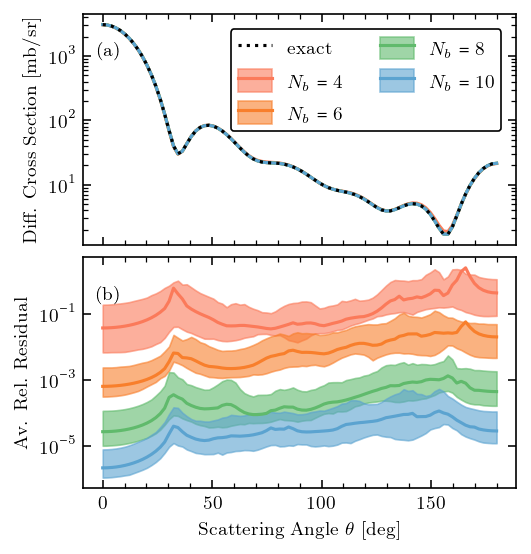

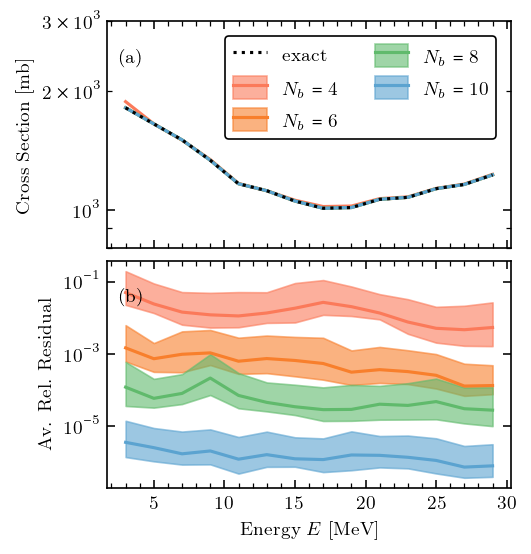

In [9]:
quantities = ["DiffCrossSects", "TotCrossSects"]
alphabet = string.ascii_lowercase

for quantity in quantities:
    fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(87*mm, 91*mm), constrained_layout=True, sharex='col')
    legendHandlers = []; legendLbls = []
    make_panel_value(axs[0], quantity, legendHandlers, legendLbls, xaxisLbl=False, tag=alphabet[0])
    make_panel_residual(axs[1], quantity, legendHandlers, legendLbls, xaxisLbl=True, tag=alphabet[1])

    axs[0].legend(legendHandlers, legendLbls, handleheight=1.5, ncol=2,
            loc="best", frameon=True, handlelength=1.8)
    
    fileName = f"{quantity}.pdf"
    fig.savefig(fileName)